In [1]:
import h5py, sys, os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from datetime import datetime
print(os.getcwd())

%matplotlib widget

from jfunctions import *

# Get directory locations from param file
base_dir, run_dir, save_dir, version = read_params("./params.dat")

print(base_dir)

/mhome/damtp/q/cwp29/diablo3/proc/jupyter/moisture
/store/ATMOS/cwp29/data/moisture/moist_exp/q0_02_phis_01/


In [3]:
#Load simulation data
phi_p, phi_c, phi_v, times = load_mean_data('total_th4', 'total_th3', 'total_th2')
NSAMP = len(times)

times, t0_idx = calibrate_time(save_dir, times)

# Load simulation metadata
md = get_metadata()

# Load grids
gxf, gyf, gzf, dzf = get_grid(md)
gx, gy, gz, dz = get_grid(md, fractional_grid=False)

Mean keys: <KeysViewHDF5 ['FTx_uu', 'PVD_bbins', 'PVD_phicbins', 'PVD_phipbins', 'PVD_phivbins', 'b_phic_F1_vol', 'b_phic_F3_vol', 'b_phic_Jc_vol', 'b_phic_K_vol', 'b_phip_F1_vol', 'b_phip_F4_vol', 'b_phiv_F1_vol', 'b_phiv_F2_vol', 'b_phiv_Jv_vol', 'cp', 'dthdz01', 'dthdz02', 'dthdz03', 'dthdz04', 'dudz', 'dvdz', 'eps_sgs1', 'eps_sgs2', 'epsilon', 'gzf', 'kappa1_net', 'kappa2_net', 'kappa3_net', 'kappa4_net', 'kappa_sgs', 'mke', 'nu_sgs', 'omega_x', 'omega_y', 'omega_z', 'pe_diss01', 'pe_diss02', 'pe_diss03', 'pe_diss04', 'shear', 'tb_source', 'tb_source_bins', 'tb_strat', 'tb_strat_bins', 'td_scatter_vol', 'thme01', 'thme02', 'thme03', 'thme04', 'thrms01', 'thrms02', 'thrms03', 'thrms04', 'thw01', 'thw01_m', 'thw02', 'thw02_m', 'thw03', 'thw03_m', 'thw04', 'thw04_m', 'time', 'total_th1', 'total_th2', 'total_th3', 'total_th4', 'u1z_x0', 'ume', 'urms', 'uu_dudx', 'uv', 'uw', 'uw_dudz', 'vme', 'vrms', 'vu_dvdx', 'vw_dvdz', 'wme', 'wrms', 'wu_dwdx', 'wv', 'ww_dwdz']>
Plume penetration occ

In [4]:
print(md)

{'LX': 0.6, 'LY': 0.6, 'LZ': 0.6, 'RE': 10000000000.0, 'nu': 1e-10, 'SAVE_MOVIE_DT': 0.25, 'SAVE_STATS_DT': 0.25, 'NU_START': 1e-09, 'SAVE_FLOW_DT': 5.0, 'VERSION': 3.12, 'NU_START_TIME': 15.0, 'r0': 0.002, 'alpha_e': 0.11, 'b0': 0.05, 'Lyc': 0.02, 'Lyp': 0.01, 'S_depth': 0.2, 'N2': 1.0, 'H': 0.2, 'b_factor': 0.25, 'phiv_factor': 0.3, 'phic_factor': 4.0, 'Nb': 128.0, 'Nphi': 128.0, 'F_TYPE': 3.0, 'phi0': 0.1, 'alpha': 67.0, 'beta': 0.51, 'tau': 0.1, 'q0': 0.2, 'phiv_min': 0.0002, 'phic_min': 0.0002, 'T': 10.0, 'Trelax': 0.5, 'w_s': 0.0, 'INIT_NOISE': 1e-08, 'shear_rate': 0.2, 'Nx': 512, 'Ny': 512, 'Nz': 513, 'Nth': 4}


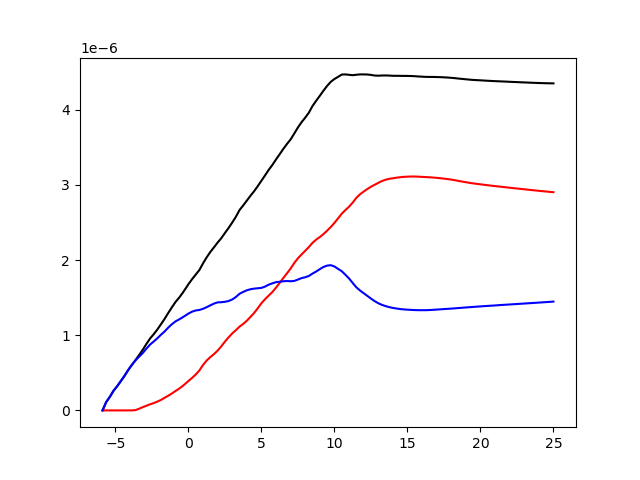

In [5]:
fig = plt.figure()
plt.plot(times, phi_p, color='k')
plt.plot(times, phi_c, color='r')
plt.plot(times, phi_v, color='b')
plt.plot(times, phi_v+phi_c, color='k', linestyle='--')